In [2]:
from IPython.display import Image

사전 훈련된 언어 모델(Pre-trained language model)을 사용하는 ELMo를 알아보자.  

### 1. ELMo

같은 표기의 단어라도 문맥에 따라서 다르게 워드 임베딩을 할 수 있으면 자연어 처리의 성능을 올릴 수 있을 것이다. 워드 임베딩 시 문맥을 고려해서 임베딩을 하겠다는 아이디어가 문맥을 반영한 워드 임베딩(Contextualized Word Embedding)이다.  

### 2. biLM(Bidirectional Language Model)의 사전 훈련

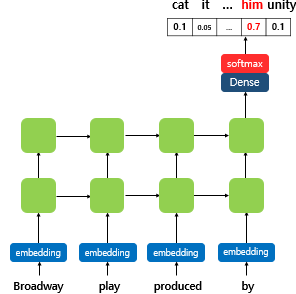

In [3]:
Image("./scr/12-08 deepbilm.png")

위 그림은 은닉층이 2개인 일반적인 단방향 RNN 언어 모델의 언어 모델링을 보여준다.  
RNN 언어 모델은 문장으로부터 단어 단위로 입력을 받는데, RNN 내부의 은닉 상태는 시점(time step)이 지날수록 점점 업데이트되어간다.     
이는 결과적으로 RNN의 값이 문장의 문맥 정보를 점차적으로 반영한다고 말할 수 있다.  
그런데 ELMo는 위의 그림의 순방향 RNN 뿐만 아니라, 위의 그림과는 반대 방향으로 문장을 스캔하는 역방향 RNN 또한 활용한다.   
ELMo는 양쪽 방향의 언어 모델을 둘 다 학습하여 활용한다고하여 이 언어 모델을 biLM(Bidirectional Language Model)이라고 한다.

ELMo에서 말하는 biLM은 기본적으로 다층 구조(Multi-layer)를 전제로 한다.   
은닉층이 최소 2개 이상이라는 의미이다.   
아래의 그림은 은닉층이 2개인 순방향 언어 모델과 역방향 언어 모델의 모습을 보여준다.  

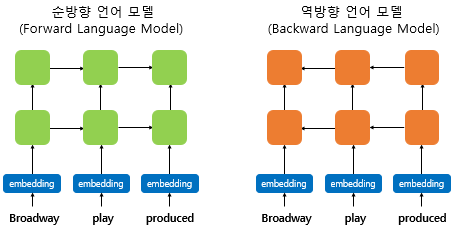

In [4]:
Image("./scr/12-08 forwardbackwordlm2.png")

이때 biLM의 각 시점의 입력이 되는 단어 벡터는 이번 챕터에서 설명한 임베딩 층(embedding layer)를 사용해서 얻은 것이 아니라 합성곱 신경망을 이용한 문자 임베딩(character embedding)을 통해 얻은 단어 벡터이다.  
  
문자 임베딩은 마치 서브단어의 정보를 참고하는 것처럼 문맥과 상관없이 dog라는 단어와 doggy란 단어의 연관성을 찾아낼 수 있다. 또 이 방법은 OOV에도 견고하다는 장점이 있다.  

주의할 점은 앞서 설명한 양방향 RNN과 ELMo에서의 biLM은 다르다는 것이다. 양방향 RNN은 순방향 RNN의 은닉 상태와 역방향의 RNN의 은닉 상태를 연결(concatenate)하여 다음층의 입력으로 사용한다.   
반면, biLM의 순방향 언어모델과 역방향 언어모델이라는 두 개의 언어 모델을 별개의 모델로 보고 학습한다.

### 3. biLM의 활용